In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [30]:
normal_dist = np.random.normal(0,1,size=(1000))

In [31]:
normal_dist

array([ 1.21091861e+00,  1.17870474e+00, -1.28754639e+00,  9.29977389e-01,
       -1.51427822e+00,  2.00356233e-01, -3.85842810e-01,  1.55857139e-02,
        5.98300719e-02, -1.69342514e-01, -1.69358183e+00,  1.06485180e+00,
        1.29917021e+00, -5.60695390e-01, -2.14555897e+00,  8.10268551e-01,
       -3.80455665e-01, -1.60002427e+00,  7.11677211e-01, -8.87676458e-01,
       -1.14996132e+00, -5.02670683e-01,  1.20266346e+00,  9.67989934e-01,
        9.17746657e-01,  6.15114255e-01,  1.05619365e+00,  8.48312797e-01,
       -1.12506446e-01, -2.30252261e-01, -1.47382825e+00, -1.03174090e+00,
        5.38963246e-01,  1.20459328e+00, -1.30032453e+00,  5.05635576e-01,
        1.65510229e-02, -6.05067732e-01, -2.84658183e-01, -9.26935780e-01,
       -1.83862440e+00,  1.19148024e-01, -7.81421147e-01,  7.16249232e-01,
        8.27952892e-01, -1.67041000e+00,  8.35594712e-01, -5.04980004e-01,
       -1.40363741e+00, -1.62368208e+00,  1.10754305e+00,  1.25304269e+00,
       -8.85239824e-01,  

In [32]:
def create_wiener(dt,t):
    norm_dist = np.random.normal(0,1,size =(1000))
    N= int(t/dt)
    Wt = np.zeros(len(normal_dist))
    for i in range(1,N):
        Wt[i] =  norm_dist[i]*np.sqrt(i*dt)
    return Wt


In [33]:
W = create_wiener(0.004,4)

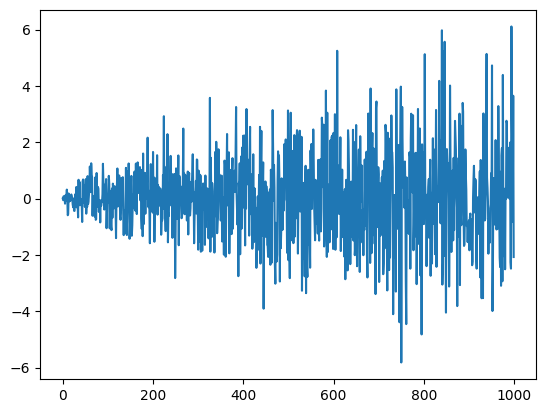

In [34]:
plt.plot(W)

In [35]:
def create_wienerbinom(t,n):
    xk = np.random.choice([1, -1], size=t, p=[0.5, 0.5])  # Случайные шаги
    wt = np.cumsum(xk)  # Кумулятивная сумма (винеровский процесс)
    return wt

In [36]:
t=1000
n=1000

In [37]:
wt=create_wienerbinom(t,n)

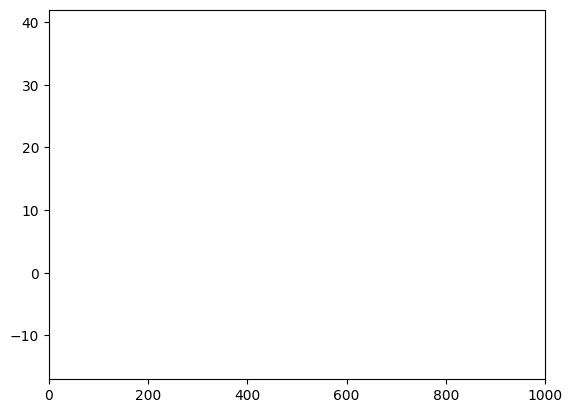

In [38]:
fig, ax = plt.subplots()

ax.set_xlim(0, t) 
ax.set_ylim(np.min(wt) - 10, np.max(wt) + 10)  
line, = ax.plot([], [], 'b-')


def init():
    line.set_data([], []) 
    return line,


def update(frame):
    x = np.arange(frame) 
    y = wt[:frame]        
    line.set_data(x, y)   
    return line,

ani = FuncAnimation(
    fig,           
    update,        
    frames=t + 1,  
    init_func=init,  
    interval=20,     
    blit=True        
)

plt.show()

In [39]:
def mu(t):
    return 0.1 * t

def sigma(t):
    return (6+2*t)/100

In [40]:
vector = np.linspace(0,4,1000)

mu = mu(vector)
sigma = sigma(vector)


In [41]:

def func_S(t, h, S_i):
    ksi = np.random.standard_normal()
    S_ii = mu(t) * h *S_i + sigma(t) * S_i *np.sqrt(h) * ksi
    return S_ii

In [43]:
def price_s (T = 4, n = 1000, s0= 10):
    h = T/n
    s_rk4 = np.zeros(n+1)
    s_rk4[0] = s0
    temp = np.linspace(0,4,1000)

    

    for i in range(n):
        k1 = func_S(i, h, s_rk4[i])
        k2 = func_S(i+(h/2), h, (s_rk4[i] + (h/2*k1)))
        k3 = func_S(i+(h/2), h, (s_rk4[i] + (h/2*k2)))
        k4 =func_S(i+(h), h, (s_rk4[i] + (h*k3)))

        s_rk4[i+1] = s_rk4[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    return s_rk4
    

In [45]:
price_s()

TypeError: 'numpy.ndarray' object is not callable